# AFD SUR LES DONNEES DIGITS 
### Le but de ce TP est d’entraîner un classifieur sur ces données, de sorte à reconnaître un chiffre manuscrit pour lequel on a une image en résolution 8 × 8


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [45]:
digits0 = datasets.load_digits()
dataset = load_digits()
digits = pd.DataFrame(digits0.data)
digits["y"] = digits0.target
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


<Figure size 720x1440 with 0 Axes>

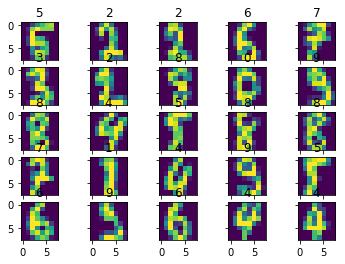

In [46]:
# Dimensions du jeu de données
n, p = tuple(digits.shape)

# Indices sous forme de matrice 5*5
indices = np.random.choice(range(n), size=25, replace=False).reshape((5, 5))

# Figure
plt.figure(figsize = (10, 20))
fig, axs = plt.subplots(nrows=5, ncols=5, sharex='col', sharey='row')

for i in range(5):
    for j in range(5):
        axs[i, j].imshow(digits0.images[indices[i, j]])
        axs[i, j].set_title(digits0.target[indices[i, j]])
plt.show()

#### Le but de ce TP est d’entraîner un classifieur sur ces données, de sorte à reconnaître un chiffre manuscrit pour lequel on a une image en résolution 8 × 8.

### En vous inspirant de ce qui est fait ici https://scikit-learn.org/stable/modules/lda_qda.html, réaliser une
AFD sur les données digits, puis commenter les résultats

In [47]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
#Récupération des données sous forme de matrice #digits.to_numpy
X,Y = load_digits(return_X_y=True)
X,Y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]), array([0, 1, 2, ..., 8, 9, 8]))

In [49]:
afd = LinearDiscriminantAnalysis()
afd.fit(X, Y)

C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [51]:
afd.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

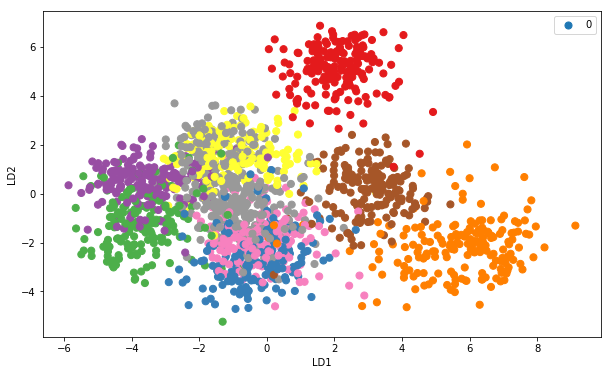

In [71]:
transformed = afd.transform(X)
fig, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('LD1')
plt.ylabel('LD2')
ax.scatter(transformed[:, 0], transformed[:, 1], c=Y, s=50, cmap=plt.cm.Set1)
plt.legend(target)
plt.show()

##### Commentaire: Les classes ont été séparées, mais la séparation n'est pas claire. Il y a beaucoup de bruit dans ce dataset 


### 3 Classifieur des k plus proches voisins

In [60]:
#Scinder aléatoirement le jeu de données en échantillon d’entraînement/échantillon test

from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,Y_train,Y_test= train_test_split(X,Y, random_state = 10, test_size = 0.30)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

### Utilisation de l’échantillon d’entraînement pour sélectionner le nombre optimal k de voisins avec GridSearch

In [73]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [74]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [77]:
knn = KNeighborsClassifier()

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [78]:
# fit the grid with data
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [80]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.98170, std: 0.00590, params: {'n_neighbors': 1},
 mean: 0.97772, std: 0.00742, params: {'n_neighbors': 2},
 mean: 0.98409, std: 0.00656, params: {'n_neighbors': 3},
 mean: 0.98091, std: 0.00517, params: {'n_neighbors': 4},
 mean: 0.98091, std: 0.00672, params: {'n_neighbors': 5},
 mean: 0.97772, std: 0.00534, params: {'n_neighbors': 6},
 mean: 0.97772, std: 0.00407, params: {'n_neighbors': 7},
 mean: 0.97613, std: 0.00653, params: {'n_neighbors': 8},
 mean: 0.97852, std: 0.00813, params: {'n_neighbors': 9},
 mean: 0.97534, std: 0.00674, params: {'n_neighbors': 10},
 mean: 0.97613, std: 0.00698, params: {'n_neighbors': 11},
 mean: 0.97534, std: 0.00762, params: {'n_neighbors': 12},
 mean: 0.97295, std: 0.00712, params: {'n_neighbors': 13},
 mean: 0.97216, std: 0.00552, params: {'n_neighbors': 14},
 mean: 0.96897, std: 0.00914, params: {'n_neighbors': 15},
 mean: 0.96897, std: 0.00803, params: {'n_neighbors': 16},
 mean: 0.96738, std: 0.00900, params: {'n_neighbors': 17},
 mean:

In [81]:
# examine the first tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Parameters
{'n_neighbors': 1}

CV Validation Score
[0.98046875 0.97628458 0.992      0.976      0.98387097]

Mean Validation Score
0.9817024661893397


In [82]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9817024661893397, 0.9777247414478918, 0.9840891010342084, 0.9809069212410502, 0.9809069212410502, 0.9777247414478918, 0.9777247414478918, 0.9761336515513126, 0.9785202863961814, 0.9753381066030231, 0.9761336515513126, 0.9753381066030231, 0.9729514717581543, 0.9721559268098647, 0.9689737470167065, 0.9689737470167065, 0.9673826571201273, 0.9657915672235481, 0.9634049323786794, 0.9626093874303898, 0.9626093874303898, 0.9634049323786794, 0.9618138424821002, 0.9610182975338106, 0.9578361177406524, 0.9538583929992045, 0.9522673031026253, 0.9474940334128878, 0.9451073985680191, 0.9443118536197295]


Text(0,0.5,'Cross-Validated Accuracy')

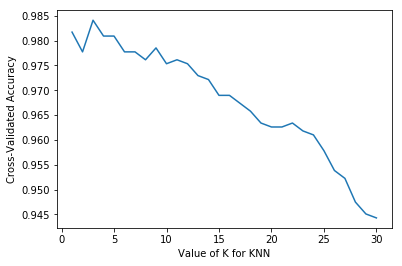

In [83]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [84]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9840891010342084
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


#### Le k optimal est k = 3

### Utilisation l’échantillon test pour évaluer le classifieur sélectionné à la question précédente. Des mesures de performances sont implémentées dans le module metrics de la librairie scikit-learn.

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(Y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 56  1  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  1  0]
 [ 0  0  1 55  0  0  0  0  0  0]
 [ 0  1  0  0 49  0  0  0  1  0]
 [ 0  0  0  1  0 49  0  0  0  1]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  2  0  1  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  1  0  1 51]]
Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.95      0.98      0.97        57
          2       0.96      0.98      0.97        55
          3       0.96      0.98      0.97        56
          4       1.00      0.96      0.98        51
          5       0.98      0.96      0.97        51
          6       0.98      1.00      0.99        55
          7       1.00      1.00      1.00        60
          8       0.94      0.94      0.94        50
          9       0.98      0.94      0.96        54

avg / total       0.98      0.98      0.98 